# Amazon Deep Learning Container

* Container Images List [link](https://github.com/aws/deep-learning-containers/blob/master/available_images.md)
* pytorch training: `763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.5.1-gpu-py36-cu101-ubuntu16.04`

# Download the pretrained yolov5s network

In [1]:
fp_yolo_cfg = './container/local_test/test_dir/input/data/cfg/yolov5s.yaml'

In [2]:
!wget 'https://raw.githubusercontent.com/ultralytics/yolov5/master/models/yolov5s.yaml' -O {fp_yolo_cfg}

--2020-08-06 16:28:49--  https://raw.githubusercontent.com/ultralytics/yolov5/master/models/yolov5s.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1455 (1.4K) [text/plain]
Saving to: ‘./container/local_test/test_dir/input/data/cfg/yolov5s.yaml’

./container/local_t 100%[===================>]   1.42K  --.-KB/s    in 0s      

2020-08-06 16:28:49 (16.6 MB/s) - ‘./container/local_test/test_dir/input/data/cfg/yolov5s.yaml’ saved [1455/1455]



In [3]:
!cat {fp_yolo_cfg}

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-

# Download the pretrained model

In [4]:
gfid_yolov5s = '1R5T6rIyy3lLwgFXNms8whc-387H0tMQO'
fp_out = './container/local_test/test_dir/input/data/weights/yolov5s.pt'

In [5]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={gfid_yolov5s}' -O {fp_out}

--2020-08-06 16:29:01--  https://docs.google.com/uc?export=download&id=1R5T6rIyy3lLwgFXNms8whc-387H0tMQO
Resolving docs.google.com (docs.google.com)... 172.217.14.206, 2607:f8b0:400a:800::200e
Connecting to docs.google.com (docs.google.com)|172.217.14.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2bmfr9jtc1hot8m8699r9iaq1eefi04e/1596731325000/18003229793517042864/*/1R5T6rIyy3lLwgFXNms8whc-387H0tMQO?e=download [following]
--2020-08-06 16:29:03--  https://doc-0c-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2bmfr9jtc1hot8m8699r9iaq1eefi04e/1596731325000/18003229793517042864/*/1R5T6rIyy3lLwgFXNms8whc-387H0tMQO?e=download
Resolving doc-0c-a4-docs.googleusercontent.com (doc-0c-a4-docs.googleusercontent.com)... 172.217.14.225, 2607:f8b0:400a:809::2001
Connecting to doc-0c-a4-docs.googleusercontent.com (doc-0c-a4-docs.googl

# Build container and run local test in terminal

* open new terminal

```
bash
cd /home/ec2-user/SageMaker/myAWSStudyBlog/yolov5-onnx-sm/3-yolov5-sm-container
./build-and-push.sh yolov5
```

In [6]:
! ./build-and-push.sh yolov5

WARNING! Using --password via the CLI is insecure. Use --password-stdin.
WARNING! Your password will be stored unencrypted in /home/ec2-user/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store

Login Succeeded
WARNING! Using --password via the CLI is insecure. Use --password-stdin.
WARNING! Your password will be stored unencrypted in /home/ec2-user/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store

Login Succeeded
base_img:763104351884.dkr.ecr.us-west-2.amazonaws.com/pytorch-training:1.5.1-gpu-py36-cu101-ubuntu16.04
Sending build context to Docker daemon  38.33MB
Step 1/13 : ARG BASE_IMG=${BASE_IMG}
Step 2/13 : FROM ${BASE_IMG}
1.5.1-gpu-py36-cu101-ubuntu16.04: Pulling from pytorch-training

7927d38a: Pulling fs layer 
ac894db4: Pulling fs layer 
2af6d627: Pulling fs layer 
862

7c6ceed: Extracting   67.4MB/482.5MBB27AExtracting  37.62MB/43.92MBDownloading    808MB/822.3MBExtracting  80.22MB/148.1MBExtracting  121.4MB/148.1MB

Digest: sha256:840117612626eb252e8d5ffe74a2cb92f79340eed7fc6fba96a6be74870d79c1[2K
Status: Downloaded newer image for 763104351884.dkr.ecr.us-west-2.amazonaws.com/pytorch-training:1.5.1-gpu-py36-cu101-ubuntu16.04
 ---> 2aa16a1b866d
Step 3/13 : ENV PATH="/opt/code:${PATH}"
 ---> Running in 7dab10c48847
Removing intermediate container 7dab10c48847
 ---> d41d8770578e
Step 4/13 : RUN apt-get update  && apt-get install -y --no-install-recommends --allow-unauthenticated     jq
 ---> Running in dafcc76234ca
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release [697 B]
Get:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release.

Removing intermediate container dbc908b3366c
 ---> daeb53666c31
Step 6/13 : RUN cd opt && git clone https://github.com/ultralytics/yolov5
 ---> Running in 38427d93451a
Cloning into 'yolov5'...
Removing intermediate container 38427d93451a
 ---> 0c55f0a5aef2
Step 7/13 : RUN pip install -r /opt/yolov5/requirements.txt
 ---> Running in 60413f7c5c1a
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121931 sha256=b1c323c98a9c63c3fd4c8417001afd35f42d12866d6ec3d563605e740253858c
  Stored in directory: /root/.cache/pip/wheels/c3/af/84/3962a6af7b4ab336e951b7877dcfb758cf94548bb1771e0679
Successfully built absl-py
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.2.2
    Uninstalling scipy-1.2.2:
      Successfully uninstalled scipy-1.2.2
  Attempting uninstall: torch
    Found existing installation: torc

 ---> 77b43b7f842e
Step 13/13 : COPY serve /opt/code
 ---> d765b270185a
Successfully built d765b270185a
Successfully tagged yolov5:latest
The push refers to repository [092115252186.dkr.ecr.us-west-2.amazonaws.com/yolov5]

9f3e4439: Preparing 
11c1ee7d: Preparing 
ef4d9d02: Preparing 
f9439648: Preparing 
0787b60d: Preparing 
479102a5: Preparing 
659f19d7: Preparing 
ff663c03: Preparing 
1ad621ae: Preparing 
d1449436: Preparing 
489ec215: Preparing 
211bfa77: Preparing 
b2eeb3a9: Preparing 
479102a5: Waiting g 
1ad621ae: Waiting g 
d1449436: Waiting g 
f663c03: Waiting g 
211bfa77: Waiting g 
489ec215: Waiting g 
b2eeb3a9: Waiting g 
80613f50: Preparing 
597b3058: Preparing 
5aceafa5: Preparing 
0755a7c: Waiting g 
0d289c4: Waiting g 
b6d9aa4: Waiting g 
0501057: Waiting g 
48c6969a: Preparing 
bafa536: Waiting g 
87dd341: Waiting g 
7f090df2: Waiting g 
97b3058: Waiting g 
9e8d85dd: Preparing 
74e50f52: Waiting g 
9683cb41: Preparing 
42719515: Preparing 
103e78c9: Preparing 
e637fbff

5dadf08: Pushing  601.6MB/1.346GB9APushing  19.17MB/48.46MBPushing  148.9MB/1.502GBPushing  79.63MB/93.84MBPushing  221.1MB/1.502GBPushing  144.9MB/358.4MBPushing  541.2MB/2.669GBPushing  629.2MB/1.102GBPushing  554.3MB/1.346GBPushing  614.8MB/1.502GB

c7dc417: Pushing  1.354GB/1.502GBPushing  206.1MB/835.6MBPushing  232.8MB/835.6MBPushing  880.6MB/1.502GBPushing  1.105GB/2.669GBPushing  974.2MB/1.502GBPushing  1.115GBPushing  1.034GB/1.502GBPushing  55.79MB/1.592GBPushing  1.225GB/1.502GB

dadd4466: Pushing  1.293GB/1.592GBPushing  427.2MB/1.592GBPushing  469.2MB/1.592GB

79102a5: Pushed   1.597GB/1.592GBlatest: digest: sha256:d1a0bad2454b80e1a6c567f0e264de5ee0e3300339683b36a07eb771bf36a6a8 size: 8499


# Run the local serv test container

Following the commands:
```
cd /home/ec2-user/SageMaker/myAWSStudyBlog/yolov5-onnx-sm/3-yolov5-sm-container/container/local_test
predict_local.sh yolov5
```

You will see the output at `test_dir/input/data/images/inference/output/`

## Change directory to 'container/local_test'

In [7]:
%cd container/local_test

/home/ec2-user/SageMaker/yolov5-on-sagemaker/2-yolov5-sm-container/container/local_test


In [8]:
!./predict_local.sh yolov5

bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/opt/ml/input/data/weights/yolov5s.pt
/opt/ml/input/data/images/inference
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/opt/ml/input/data/images/inference', update=False, view_img=False, weights=['/opt/ml/input/data/weights/yolov5s.pt'])
Using CPU

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
image 1/2 /opt/ml/input/data/images/inference/bus.jpg: 640x512 4 persons, 1 buss, Done. (0.155s)
image 2/2 /opt/ml/input/data/images/inference/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.111s)
Results saved to inference/output
Done. (0.344s)


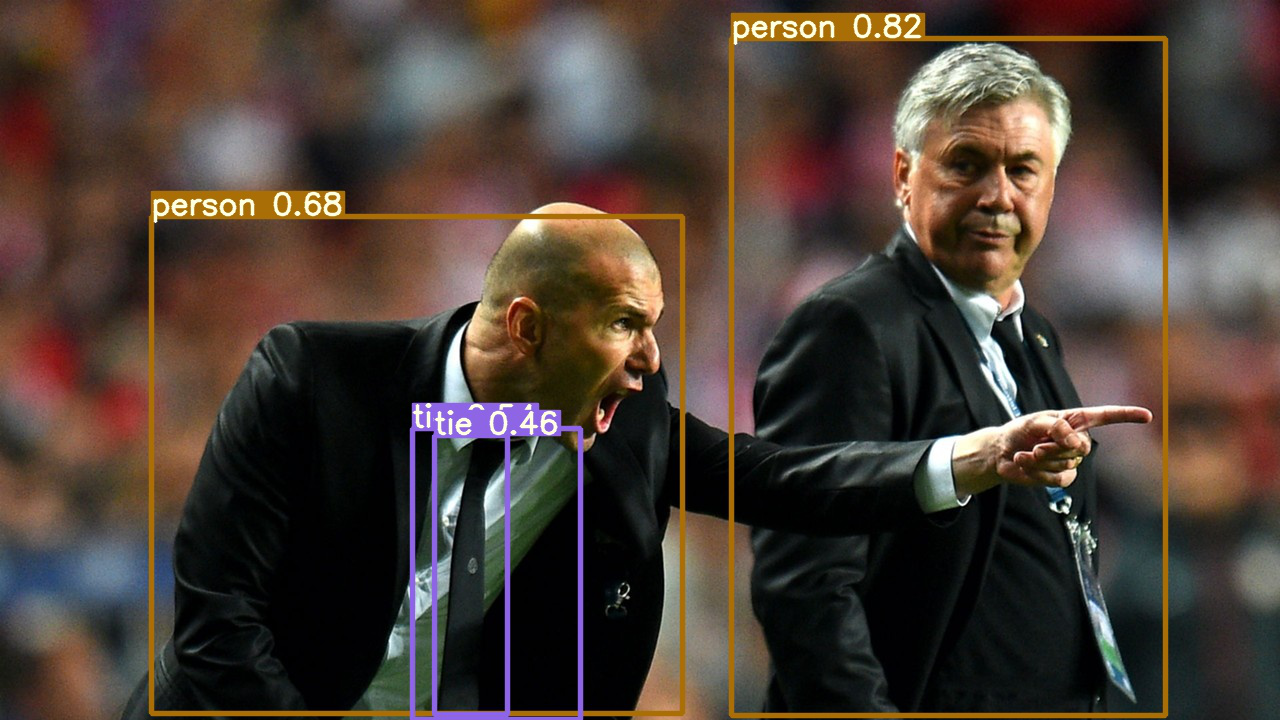

In [9]:
from PIL import Image

fp_img_out = './test_dir/input/data/images/inference/output/zidane.jpg'
img = Image.open(fp_img_out)
display(img)

# Local Training

In [ ]:
!./train_local.sh yolov5

# Train on SageMaker Host

In [11]:
# push test_data into s3 bucket
import boto3
region = boto3.session.Session().region_name
bucket = 'beyoung-sm-yolo5-20200806'
!aws s3api create-bucket --bucket {bucket} --create-bucket-configuration LocationConstraint={region}

{
    "Location": "http://beyoung-sm-yolo5-20200806.s3.amazonaws.com/"
}


In [12]:
%cd ../..

/home/ec2-user/SageMaker/yolov5-on-sagemaker/2-yolov5-sm-container


In [ ]:
!aws s3 cp --recursive container/local_test/test_dir/ s3://{bucket}

In [14]:
# ECR URI
account=boto3.client('sts').get_caller_identity().get('Account')
repositoryUri="{}.dkr.ecr.{}.amazonaws.com/yolov5".format(account, region)
repositoryUri

'092115252186.dkr.ecr.us-west-2.amazonaws.com/yolov5'

In [15]:
from datetime import datetime
now = datetime.now()
job_name = 'yolov5-' + now.strftime("%Y-%m-%d-%H-%M-%S")
job_name

'yolov5-2020-08-06-16-38-59'

In [16]:
# cfg  images weights labels
cfg='s3://{}/input/data/cfg/'.format(bucket)
images='s3://{}/input/data/images/'.format(bucket)
weights='s3://{}/input/data/weights/'.format(bucket)
labels='s3://{}/input/data/labels/'.format(bucket)
outpath='s3://{}/results/'.format(bucket)

In [17]:
import sagemaker
from sagemaker import get_execution_role
role = get_execution_role()
sm = boto3.client('sagemaker')

In [18]:
response = sm.create_training_job(
      TrainingJobName=job_name,
      AlgorithmSpecification={
          'TrainingImage': repositoryUri,
          'TrainingInputMode': 'File',
      },
      RoleArn=role,
      InputDataConfig=[
          {
              'ChannelName': 'cfg',
              'DataSource': {
                  'S3DataSource': {
                      'S3DataType': 'S3Prefix',
                      'S3Uri': cfg,
                      'S3DataDistributionType': 'FullyReplicated',
                  },
              },
              'InputMode': 'File'
          },
          {
              'ChannelName': 'images',
              'DataSource': {
                  'S3DataSource': {
                      'S3DataType': 'S3Prefix',                      
                      'S3Uri': images,
                      'S3DataDistributionType': 'FullyReplicated',
                  },
              },
              'InputMode': 'File'
          },
          {
              'ChannelName': 'labels',
              'DataSource': {
                  'S3DataSource': {
                      'S3DataType': 'S3Prefix',                      
                      'S3Uri': labels,
                      'S3DataDistributionType': 'FullyReplicated',
                  },
              },
              'InputMode': 'File'
          },
          {
              'ChannelName': 'weights',
              'DataSource': {
                  'S3DataSource': {
                      'S3DataType': 'S3Prefix',                      
                      'S3Uri': weights,
                      'S3DataDistributionType': 'FullyReplicated',
                  },
              },
              'InputMode': 'File'
          }
      ],
      OutputDataConfig={
          'S3OutputPath': outpath
      },
      ResourceConfig={
          'InstanceType': 'ml.p3.2xlarge',
          'InstanceCount': 1,
          'VolumeSizeInGB': 10,
      },
      StoppingCondition={
        'MaxRuntimeInSeconds': 60*60*5,
      }
  )
response

{'TrainingJobArn': 'arn:aws:sagemaker:us-west-2:092115252186:training-job/yolov5-2020-08-06-16-38-59',
 'ResponseMetadata': {'RequestId': '107bf839-dc40-4e3e-b3ae-4c5d6bb679d4',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '107bf839-dc40-4e3e-b3ae-4c5d6bb679d4',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '101',
   'date': 'Thu, 06 Aug 2020 16:39:09 GMT'},
  'RetryAttempts': 0}}

In [19]:
import time
sm = boto3.client('sagemaker')

result = 1
while result is not 0:
    result = 0    
    respones = sm.describe_training_job(TrainingJobName=job_name)['TrainingJobStatus']
    print("job status:{}".format(respones))
    status = 0 if respones == 'Completed' else 1
    result = result + status
    time.sleep(20)
print('all job completed')

job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:InProgress
job status:Completed
all job completed


In [20]:
respone = sm.describe_training_job(TrainingJobName=job_name)
model_url = respone['ModelArtifacts']['S3ModelArtifacts']
model_url

's3://beyoung-sm-yolo5-20200806/results/yolov5-2020-08-06-16-38-59/output/model.tar.gz'

In [21]:
!aws s3 cp {model_url} ./model.tar.gz

download: s3://beyoung-sm-yolo5-20200806/results/yolov5-2020-08-06-16-38-59/output/model.tar.gz to ./model.tar.gz


In [22]:
!tar -xvf ./model.tar.gz

runs/
runs/exp0/
runs/exp0/results.png
runs/exp0/labels.png
runs/exp0/test_batch0_gt.jpg
runs/exp0/hyp.yaml
runs/exp0/test_batch0_pred.jpg
runs/exp0/train_batch2.jpg
runs/exp0/train_batch1.jpg
runs/exp0/results.txt
runs/exp0/events.out.tfevents.1596732308.algo-1.33.0
runs/exp0/train_batch0.jpg
runs/exp0/opt.yaml
runs/exp0/weights/
runs/exp0/weights/last.pt
runs/exp0/weights/best.pt


### Go to SageMaker and see the training job

## Reference and working notes

#### harmless error about hostname

* checkout the issue143 [link](https://github.com/aws/sagemaker-pytorch-training-toolkit/issues/143)

In [ ]:
docker run -v $(pwd)/test_dir:/opt/ml -it --rm yolov5 bash
nvidia-docker run -v $(pwd)/test_dir:/opt/ml --rm ${image} train

In [ ]:
python /opt/yolov5/train.py --img 640 --batch 16 --epochs 5 --data /opt/ml/input/data/cfg/coco128.yaml \
--cfg /opt/ml/input/data/cfg/yolov5s.yaml --weights /opt/ml/input/data/weights/yolov5s.pt

In [ ]:
## log directory, use tensorboard
tb_writer = SummaryWriter(log_dir=increment_dir('runs/exp', opt.name))

def increment_dir(dir, comment=''):
    # Increments a directory runs/exp1 --> runs/exp2_comment
    n = 0  # number
    dir = str(Path(dir))  # os-agnostic
    d = sorted(glob.glob(dir + '*'))  # directories
    if len(d):
        n = max([int(x[len(dir):x.find('_') if '_' in x else None]) for x in d]) + 1  # increment
    return dir + str(n) + ('_' + comment if comment else '')